In [1]:
import pandas as pd

# Load sales data
sales = pd.read_csv("../data/raw/sales_train_validation.csv")

# Melt wide format to long format
sales_long = pd.melt(
    sales,
    id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'],
    var_name='d',
    value_name='sales'
)

print(sales_long.head())


                              id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id    d  sales  
0       CA  d_1      0  
1       CA  d_1      0  
2       CA  d_1      0  
3       CA  d_1      0  
4       CA  d_1      0  


In [2]:
# Load calendar data
calendar = pd.read_csv("../data/raw/calendar.csv")

# Merge with calendar on 'd' column
sales_long = sales_long.merge(calendar, on='d', how='left')

# Preview
print(sales_long[['id', 'd', 'date', 'sales', 'event_name_1', 'weekday']].head())


                              id    d        date  sales event_name_1  \
0  HOBBIES_1_001_CA_1_validation  d_1  2011-01-29      0          NaN   
1  HOBBIES_1_002_CA_1_validation  d_1  2011-01-29      0          NaN   
2  HOBBIES_1_003_CA_1_validation  d_1  2011-01-29      0          NaN   
3  HOBBIES_1_004_CA_1_validation  d_1  2011-01-29      0          NaN   
4  HOBBIES_1_005_CA_1_validation  d_1  2011-01-29      0          NaN   

    weekday  
0  Saturday  
1  Saturday  
2  Saturday  
3  Saturday  
4  Saturday  


In [3]:
# Load sell prices data
prices = pd.read_csv("../data/raw/sell_prices.csv")

# Merge on store_id, item_id, and wm_yr_wk
sales_long = sales_long.merge(
    prices,
    on=['store_id', 'item_id', 'wm_yr_wk'],
    how='left'
)

# Preview
print(sales_long[['id', 'date', 'sales', 'sell_price']].head())


                              id        date  sales  sell_price
0  HOBBIES_1_001_CA_1_validation  2011-01-29      0         NaN
1  HOBBIES_1_002_CA_1_validation  2011-01-29      0         NaN
2  HOBBIES_1_003_CA_1_validation  2011-01-29      0         NaN
3  HOBBIES_1_004_CA_1_validation  2011-01-29      0         NaN
4  HOBBIES_1_005_CA_1_validation  2011-01-29      0         NaN


In [4]:
print(sales_long[['id', 'date', 'sales', 'sell_price']])

                                     id        date  sales  sell_price
0         HOBBIES_1_001_CA_1_validation  2011-01-29      0         NaN
1         HOBBIES_1_002_CA_1_validation  2011-01-29      0         NaN
2         HOBBIES_1_003_CA_1_validation  2011-01-29      0         NaN
3         HOBBIES_1_004_CA_1_validation  2011-01-29      0         NaN
4         HOBBIES_1_005_CA_1_validation  2011-01-29      0         NaN
...                                 ...         ...    ...         ...
58327365    FOODS_3_823_WI_3_validation  2016-04-24      1        2.98
58327366    FOODS_3_824_WI_3_validation  2016-04-24      0        2.48
58327367    FOODS_3_825_WI_3_validation  2016-04-24      0        3.98
58327368    FOODS_3_826_WI_3_validation  2016-04-24      3        1.28
58327369    FOODS_3_827_WI_3_validation  2016-04-24      0        1.00

[58327370 rows x 4 columns]


In [5]:
sales_long.sort_values(by=['store_id', 'item_id', 'date'], inplace=True)
sales_long['sell_price'] = sales_long.groupby(['store_id', 'item_id'])['sell_price'].ffill()


In [6]:
sales_long = sales_long.dropna(subset=['sell_price'])


In [7]:
print(sales_long)

                                       id          item_id      dept_id  \
1612          FOODS_1_001_CA_1_validation      FOODS_1_001      FOODS_1   
32102         FOODS_1_001_CA_1_validation      FOODS_1_001      FOODS_1   
62592         FOODS_1_001_CA_1_validation      FOODS_1_001      FOODS_1   
93082         FOODS_1_001_CA_1_validation      FOODS_1_001      FOODS_1   
123572        FOODS_1_001_CA_1_validation      FOODS_1_001      FOODS_1   
...                                   ...              ...          ...   
58203972  HOUSEHOLD_2_516_WI_3_validation  HOUSEHOLD_2_516  HOUSEHOLD_2   
58234462  HOUSEHOLD_2_516_WI_3_validation  HOUSEHOLD_2_516  HOUSEHOLD_2   
58264952  HOUSEHOLD_2_516_WI_3_validation  HOUSEHOLD_2_516  HOUSEHOLD_2   
58295442  HOUSEHOLD_2_516_WI_3_validation  HOUSEHOLD_2_516  HOUSEHOLD_2   
58325932  HOUSEHOLD_2_516_WI_3_validation  HOUSEHOLD_2_516  HOUSEHOLD_2   

             cat_id store_id state_id       d  sales        date  wm_yr_wk  \
1612          FOODS  

In [8]:
# Example: 7-day and 28-day lag
sales_long['lag_7'] = sales_long.groupby('id')['sales'].shift(7)
sales_long['lag_28'] = sales_long.groupby('id')['sales'].shift(28)


In [9]:
# 7-day rolling mean using lag_7 as the anchor
sales_long['rolling_mean_7'] = sales_long.groupby('id')['sales'].shift(7).rolling(window=7).mean()

# 28-day rolling mean
sales_long['rolling_mean_28'] = sales_long.groupby('id')['sales'].shift(28).rolling(window=28).mean()


In [10]:
# Convert 'date' column to datetime if not already
sales_long['date'] = pd.to_datetime(sales_long['date'])

# Date-based features
sales_long['day_of_week'] = sales_long['date'].dt.dayofweek        # Monday = 0, Sunday = 6
sales_long['month'] = sales_long['date'].dt.month
sales_long['year'] = sales_long['date'].dt.year
sales_long['is_weekend'] = sales_long['day_of_week'].isin([5, 6]).astype(int)

# Event feature (from calendar merge)
sales_long['event'] = sales_long['event_name_1'].notna().astype(int)  # 1 if there's an event


In [11]:
cols_to_drop = [
    'event_name_1', 'event_type_1',
    'event_name_2', 'event_type_2',
    'snap_CA', 'snap_TX', 'snap_WI',
    'wm_yr_wk'
]

# Drop only columns that exist
sales_long = sales_long.drop(columns=[col for col in cols_to_drop if col in sales_long.columns])


In [12]:
sales_long.isnull().sum().sort_values(ascending=False)


rolling_mean_28    1676950
lag_28              853720
rolling_mean_7      396370
lag_7               213430
id                       0
month                    0
is_weekend               0
day_of_week              0
sell_price               0
year                     0
wday                     0
item_id                  0
weekday                  0
date                     0
sales                    0
d                        0
state_id                 0
store_id                 0
cat_id                   0
dept_id                  0
event                    0
dtype: int64

In [13]:
sales_model = sales_long.dropna(
    subset=['lag_7', 'lag_28', 'rolling_mean_7', 'rolling_mean_28']
).copy()


In [14]:
# Forecast horizon
horizon = 28

# Last date in the data
max_date = sales_model['date'].max()

# Training data: up to 28 days before max
train_data = sales_model[sales_model['date'] <= max_date - pd.Timedelta(days=horizon)]

# Validation data: the final 28 days
valid_data = sales_model[sales_model['date'] > max_date - pd.Timedelta(days=horizon)]

sales_model.to_csv("sales_model_with_features.csv", index=False)



In [15]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from lightgbm import LGBMRegressor, early_stopping
from sklearn.metrics import mean_squared_error
import numpy as np

# 1. Label encode BEFORE creating X_train/X_valid
# Make defensive copies
train_data = train_data.copy()
valid_data = valid_data.copy()

# Label encode weekday
combined_weekdays = pd.concat([train_data['weekday'], valid_data['weekday']])
le = LabelEncoder()
le.fit(combined_weekdays)

train_data['weekday'] = le.transform(train_data['weekday'])
valid_data['weekday'] = le.transform(valid_data['weekday'])


# 2. Define features and target
features = [
    'lag_7', 'lag_28',
    'rolling_mean_7', 'rolling_mean_28',
    'sell_price',
    'wday', 'weekday', 'month', 'year',
    'is_weekend'
]
target = 'sales'

# 3. Create feature matrices
X_train = train_data[features]
y_train = train_data[target]
X_valid = valid_data[features]
y_valid = valid_data[target]

# 4. Train LightGBM model
model = LGBMRegressor(
    objective='regression',
    n_estimators=1000,
    random_state=42
)

model.fit(
    X_train, y_train,
    eval_set=[(X_valid, y_valid)],
    eval_metric='rmse',
    callbacks=[early_stopping(stopping_rounds=50)],
)

# 5. Predict and evaluate
y_pred = model.predict(X_valid)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print(f"Validation RMSE: {rmse:.2f}")



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.403295 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 992
[LightGBM] [Info] Number of data points in the train set: 43497375, number of used features: 10
[LightGBM] [Info] Start training from score 1.425404
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[99]	valid_0's rmse: 2.05444	valid_0's l2: 4.22074
Validation RMSE: 2.05


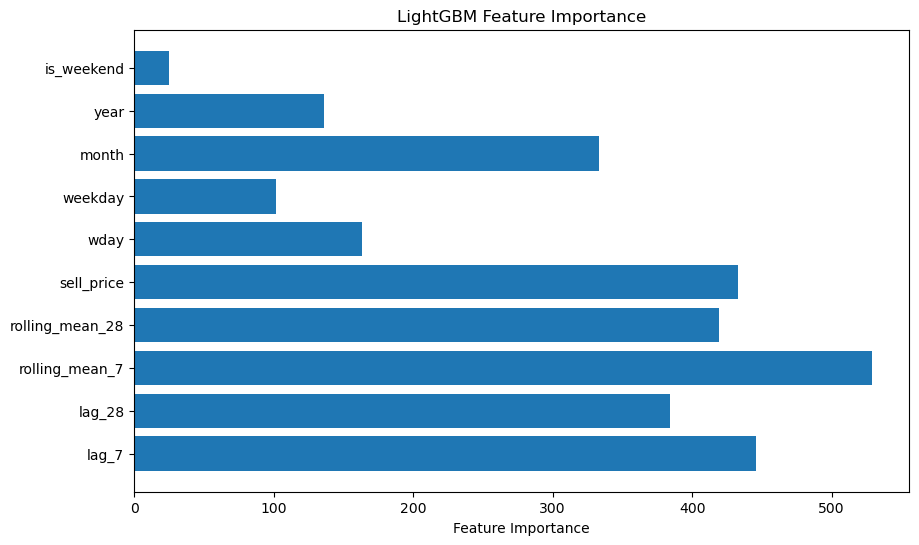

In [16]:
import matplotlib.pyplot as plt

lgbm_importances = model.feature_importances_
feature_names = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, lgbm_importances)
plt.xlabel("Feature Importance")
plt.title("LightGBM Feature Importance")
plt.show()


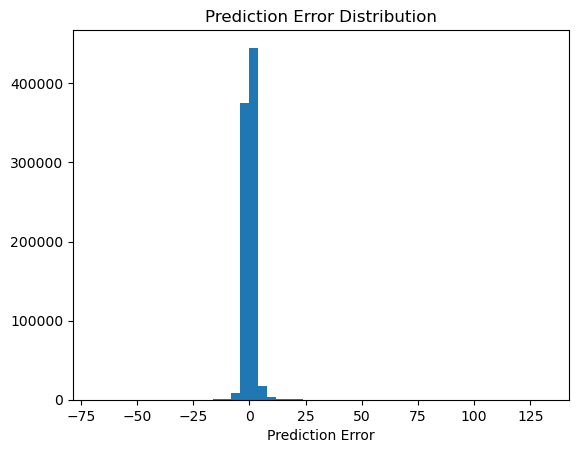

In [17]:
errors = y_valid - y_pred
plt.hist(errors, bins=50)
plt.xlabel("Prediction Error")
plt.title("Prediction Error Distribution")
plt.show()


In [18]:
rmse / y_valid.mean()


1.4818200385432625

In [ ]:

from sklearn.preprocessing import LabelEncoder
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd



# Use all available data for training
train_data = sales_model[sales_model['date'] <= max_date].copy()

# Label encode 'weekday'
le = LabelEncoder()
le.fit(train_data['weekday'])  # Only need training set now
train_data['weekday'] = le.transform(train_data['weekday'])

# Define features and target
features = [
    'lag_7', 'lag_28',
    'rolling_mean_7', 'rolling_mean_28',
    'sell_price',
    'wday', 'weekday', 'month', 'year',
    'is_weekend'
]
target = 'sales'

# Create feature matrix
X_train_full = train_data[features]
y_train_full = train_data[target]

# Initialize and train model
final_model = LGBMRegressor(
    objective='regression',
    n_estimators=500,  # fewer rounds, no early stopping this time
    random_state=42
)

final_model.fit(X_train_full, y_train_full)

print("✅ Model trained on full dataset")

import joblib
from tqdm import tqdm

# Save model
joblib.dump(final_model, "final_lightgbm_model.pkl")


In [1]:
import joblib
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
import gc

# 1. Load sales_model
sales_model = pd.read_csv("sales_model_with_features.csv", parse_dates=["date"])

# 2. Convert categorical columns to save memory
cat_cols = ['id', 'store_id', 'item_id', 'weekday']
for col in cat_cols:
    sales_model[col] = sales_model[col].astype('category')

# 3. Reload model
final_model = joblib.load("final_lightgbm_model.pkl")

# 4. Set max date
max_date = sales_model['date'].max()

# 5. Rebuild LabelEncoder
le = LabelEncoder()
le.fit(sales_model[sales_model['date'] <= max_date]['weekday'])

# 6. Forecast next 28 days
forecast_days = 28
future_dates = [max_date + pd.Timedelta(days=i+1) for i in range(forecast_days)]

# 7. Setup for prediction
future_df = sales_model.copy()
all_preds = []

# 8. Feature list
features = [
    'lag_7', 'lag_28',
    'rolling_mean_7', 'rolling_mean_28',
    'sell_price',
    'wday', 'weekday', 'month', 'year',
    'is_weekend'
]

# 9. Rolling forecast
for date in tqdm(future_dates):
    temp_df = future_df[future_df['date'] < date].copy()
    temp_df.sort_values(by=['store_id', 'item_id', 'date'], inplace=True)

    # Feature engineering
    temp_df['lag_7'] = temp_df.groupby('id')['sales'].shift(7)
    temp_df['lag_28'] = temp_df.groupby('id')['sales'].shift(28)
    temp_df['rolling_mean_7'] = (
        temp_df.groupby('id')['sales']
        .shift(7).rolling(window=7).mean().reset_index(0, drop=True)
    )
    temp_df['rolling_mean_28'] = (
        temp_df.groupby('id')['sales']
        .shift(28).rolling(window=28).mean().reset_index(0, drop=True)
    )

    input_df = temp_df[temp_df['date'] == date - pd.Timedelta(days=1)].copy()
    input_df['date'] = date
    input_df['month'] = date.month
    input_df['year'] = date.year
    input_df['is_weekend'] = int(date.weekday() in [5, 6])
    input_df['weekday'] = le.transform([date.strftime('%A')] * len(input_df))
    input_df['wday'] = (date.weekday() + 1) % 7 + 1

    # Predict and store
    X_input = input_df[features]
    y_pred = final_model.predict(X_input)
    input_df['sales'] = y_pred
    input_df['forecast_day'] = date
    all_preds.append(input_df[['id', 'forecast_day', 'sales']])
    
    # Append to simulate real future
    future_df = pd.concat([future_df, input_df], ignore_index=True)

    # Clean up to free memory
    del temp_df, input_df, X_input, y_pred
    gc.collect()

# 10. Save results
forecast_df = pd.concat(all_preds)
forecast_df.to_csv("forecast_lightgbm_long1.csv", index=False)

forecast_df.pivot(index='id', columns='forecast_day', values='sales')\
    .reset_index().to_csv("forecast_lightgbm_wide.csv1", index=False)

print("✅ Forecasts complete and saved.")


100%|███████████████████████████████████████████| 28/28 [35:32<00:00, 76.16s/it]


✅ Forecasts complete and saved.


In [7]:
# 1. Load true evaluation data
true_eval = pd.read_csv("../data/raw/sales_train_evaluation.csv")

# 2. Convert to long format
true_eval_long = true_eval.melt(
    id_vars=['id'],
    var_name='d',
    value_name='actual_sales'
)

# 3. Map d to date using calendar
calendar = pd.read_csv("../data/raw/calendar.csv")
d_to_date = dict(zip(calendar['d'], calendar['date']))
true_eval_long['date'] = true_eval_long['d'].map(d_to_date)
true_eval_long['date'] = pd.to_datetime(true_eval_long['date'])

# 4. Fix IDs to match prediction format
pred_df = pd.read_csv("forecast_lightgbm_long1.csv")
pred_df['id'] = pred_df['id'].str.replace('_validation$', '_evaluation', regex=True)
pred_df['date'] = pd.to_datetime(pred_df['forecast_day'])

# 5. Merge predictions with true evaluation data
merged = pd.merge(pred_df, true_eval_long, on=['id', 'date'], how='inner')
print("✅ Merged shape:", merged.shape)

# 6. Calculate RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(merged['actual_sales'], merged['sales']))
print("✅ RMSE on evaluation set:", rmse)


✅ Merged shape: (853720, 6)
✅ RMSE on evaluation set: 3.459488675965993


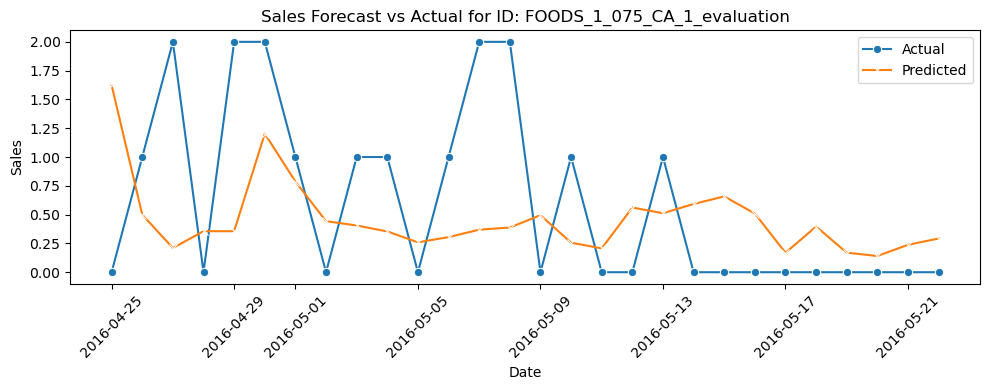

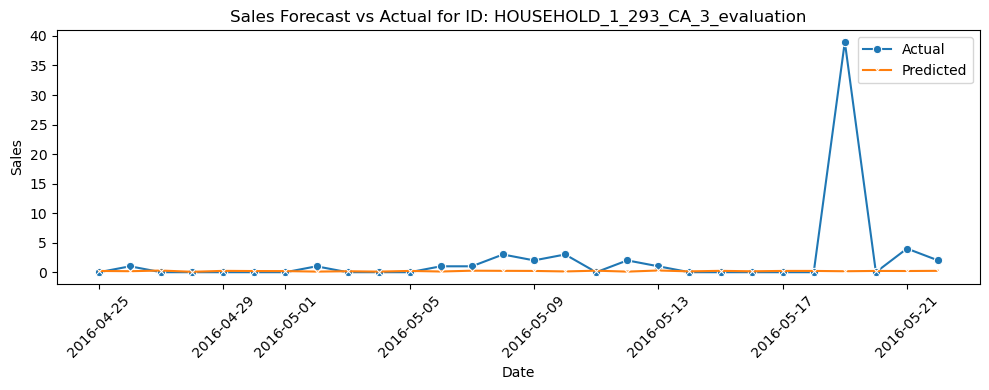

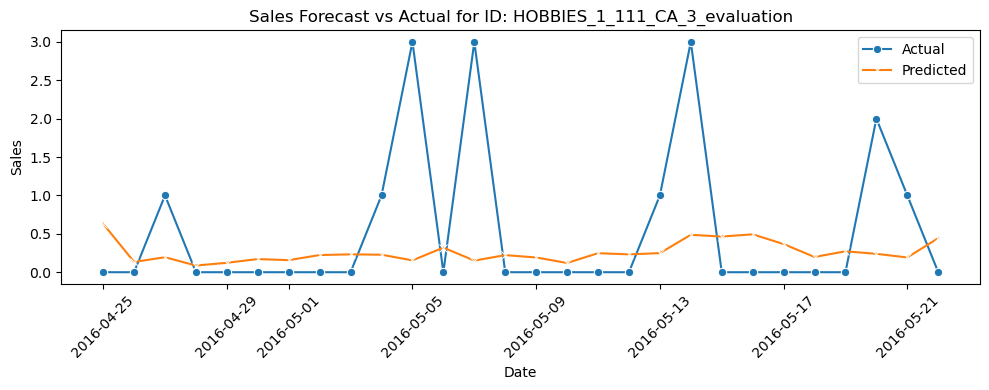

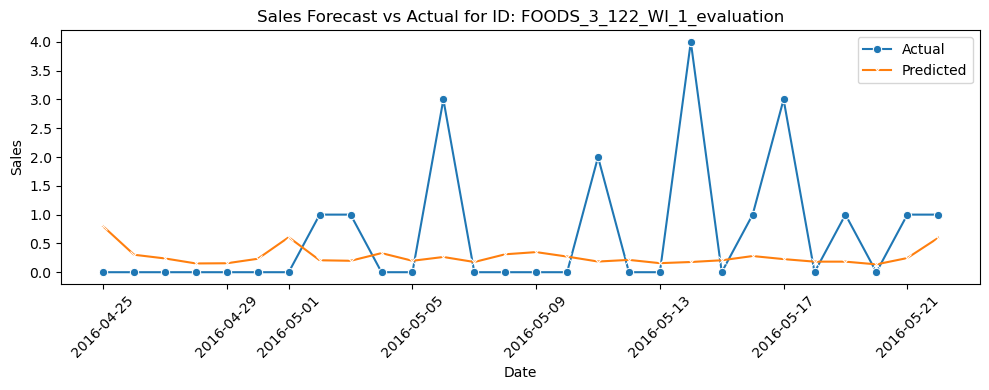

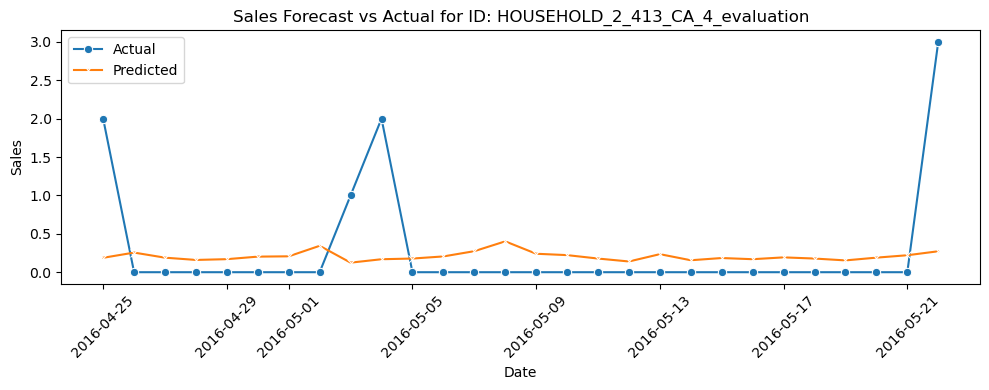

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pick 5 random item ids
sample_ids = np.random.choice(merged['id'].unique(), 5, replace=False)

# Plot
for item_id in sample_ids:
    item_df = merged[merged['id'] == item_id].copy()
    plt.figure(figsize=(10, 4))
    sns.lineplot(data=item_df, x='date', y='actual_sales', label='Actual', marker='o')
    sns.lineplot(data=item_df, x='date', y='sales', label='Predicted', marker='x')
    plt.title(f"Sales Forecast vs Actual for ID: {item_id}")
    plt.ylabel("Sales")
    plt.xlabel("Date")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [ ]:
# 📈 Plotting actual vs predicted sales for randomly selected items
# This helps visually assess how well the model captures sales trends.
# We look for close alignment between the two curves—large gaps may suggest underfitting, overfitting, or missing signals.


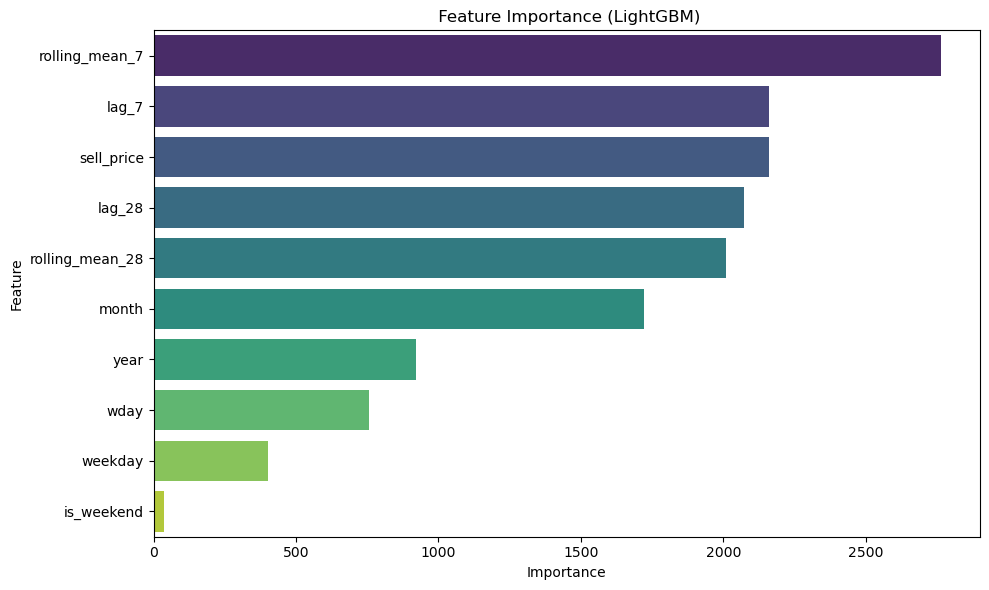

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load model
final_model = joblib.load("../model/final_lightgbm_model.pkl")

# Get feature names from the booster
feature_names = final_model.booster_.feature_name()
importances = final_model.feature_importances_

# Plot
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title(" Feature Importance (LightGBM)")
plt.tight_layout()
plt.show()


In [ ]:
#The model relies heavily on recent sales (lag_1, rolling_mean_7), product pricing (sell_price) to forecast future sales. This makes sense, as past trends often drive short-term retail demand.

In [24]:
merged['cat_id'] = merged['id'].str.extract(r'_([A-Z]+)_')
merged.groupby('cat_id').apply(lambda df: np.sqrt(mean_squared_error(df['actual_sales'], df['sales'])))


cat_id
CA    3.426670
TX    3.221975
WI    3.722409
dtype: float64